In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [2]:
df = pd.read_csv('prices_round_3_day_0.csv', delimiter=';')
df.fillna(0, inplace=True)

In [3]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,0.0,0.0,0.0,0.0,8001,111,0.0,0.0,0.0,0.0,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,0.0,0.0,0.0,0.0,4001,210,0.0,0.0,0.0,0.0,4000.0,0.0
2,0,0,ROSES,14999,72,0.0,0.0,0.0,0.0,15001,72,0.0,0.0,0.0,0.0,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,0.0,0.0,71362,19,71363.0,24.0,0.0,0.0,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,0.0,0.0,71145,19,71146.0,21.0,0.0,0.0,71138.0,0.0
39996,0,999900,CHOCOLATE,7987,124,0.0,0.0,0.0,0.0,7989,124,0.0,0.0,0.0,0.0,7988.0,0.0
39997,0,999900,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0
39998,0,999900,ROSES,14550,18,14549.0,46.0,0.0,0.0,14551,64,0.0,0.0,0.0,0.0,14550.5,0.0


In [4]:
def find_average(row):
    try:
        return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
    row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
    row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                    row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])
    except:
        return 0

df['avg_price'] = df.apply(find_average, axis=1)

In [8]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,avg_price
0,0,0,CHOCOLATE,7999,111,0.0,0.0,0.0,0.0,8001,111,0.0,0.0,0.0,0.0,8000.0,0.0,8000.000000
1,0,0,STRAWBERRIES,3999,210,0.0,0.0,0.0,0.0,4001,210,0.0,0.0,0.0,0.0,4000.0,0.0,4000.000000
2,0,0,ROSES,14999,72,0.0,0.0,0.0,0.0,15001,72,0.0,0.0,0.0,0.0,15000.0,0.0,15000.000000
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,0.0,0.0,71362,19,71363.0,24.0,0.0,0.0,71355.0,0.0,71355.000000
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0,71349.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,0.0,0.0,71145,19,71146.0,21.0,0.0,0.0,71138.0,0.0,71138.000000
39996,0,999900,CHOCOLATE,7987,124,0.0,0.0,0.0,0.0,7989,124,0.0,0.0,0.0,0.0,7988.0,0.0,7988.000000
39997,0,999900,GIFT_BASKET,71117,2,71116.0,16.0,71115.0,18.0,71128,2,71130.0,16.0,71131.0,18.0,71122.5,0.0,71122.972222
39998,0,999900,ROSES,14550,18,14549.0,46.0,0.0,0.0,14551,64,0.0,0.0,0.0,0.0,14550.5,0.0,14550.140625


In [28]:
# this is what we think the price of basket is
# this is the actual price of the basket
it = 0
gb_we_think = []
while it != 999900:
    new_df = df[df["timestamp"] ==it]
    #what we think gift basket is worth
    straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["avg_price"])
    choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["avg_price"])
    roses_price = float(new_df[new_df["product"]=="ROSES"]["avg_price"])
    price = 6*straw_price + 4*choc_price + roses_price
    # print(price)
    gb_we_think.append(price)
    it += 100
# for row in df.iterrows():
#     timestep = row["timestamp"]
#     avg = row
new_df = df[df["timestamp"] ==it]
#what we think gift basket is worth
straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["avg_price"])
choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["avg_price"])
roses_price = float(new_df[new_df["product"]=="ROSES"]["avg_price"])
price = 6*straw_price + 4*choc_price + roses_price
# print(price)
gb_we_think.append(price)

C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\116199288.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["avg_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\116199288.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["avg_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\116199288.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  roses_price = float(new_df[new_df["product"]=="ROSES"]["avg_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\116199288.py:20: FutureWarning: Calling float on a single element Series is deprecated and will

In [23]:
real_price = df[df["product"] == "GIFT_BASKET"]["avg_price"]

In [27]:
print(len(real_price))
print(len(gb_we_think))

10000
9999


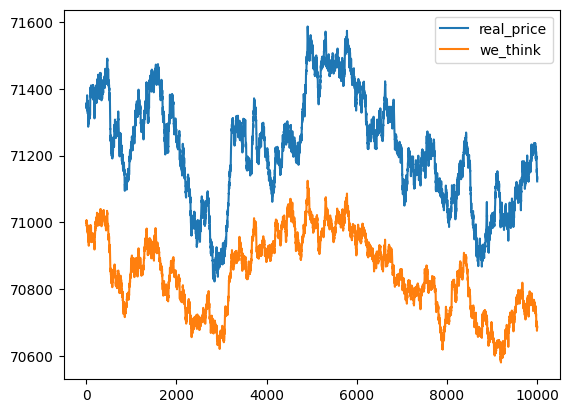

In [29]:
x = [i for i in range(len(real_price))]

plt.plot(x, real_price, label="real_price")
plt.plot(x, gb_we_think, label="we_think")
plt.legend()
plt.show()

In [30]:
bias = np.array(real_price) - np.array(gb_we_think)

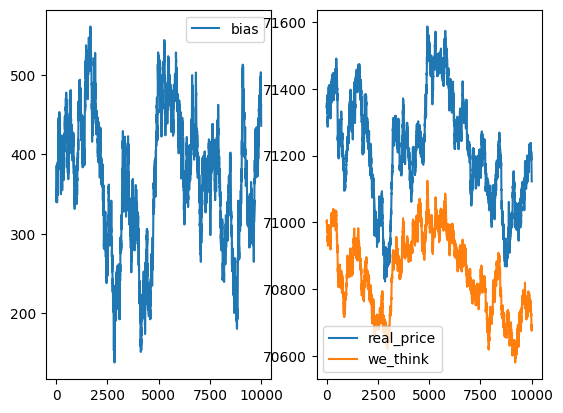

In [37]:
bias
plt.subplot(1,2,1)
plt.plot(x, bias, label = "bias")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, real_price, label="real_price")
plt.plot(x, gb_we_think, label="we_think")

plt.legend()
plt.show()

In [19]:
float(new_df[new_df["product"]=="STRAWBERRIES"].avg_price)

C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\983011197.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(new_df[new_df["product"]=="STRAWBERRIES"].avg_price)


4000.0

In [38]:
# this is what we think the price of basket is
# this is the actual price of the basket
it = 0
gb_we_think_mid = []
while it != 999900:
    new_df = df[df["timestamp"] ==it]
    #what we think gift basket is worth
    straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["mid_price"])
    choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["mid_price"])
    roses_price = float(new_df[new_df["product"]=="ROSES"]["mid_price"])
    price = 6*straw_price + 4*choc_price + roses_price
    # print(price)
    gb_we_think_mid.append(price)
    it += 100
# for row in df.iterrows():
#     timestep = row["timestamp"]
#     avg = row
new_df = df[df["timestamp"] ==it]
#what we think gift basket is worth
straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["mid_price"])
choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["mid_price"])
roses_price = float(new_df[new_df["product"]=="ROSES"]["mid_price"])
price = 6*straw_price + 4*choc_price + roses_price
# print(price)
gb_we_think_mid.append(price)

C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\1469658907.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  straw_price = float(new_df[new_df["product"]=="STRAWBERRIES"]["mid_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\1469658907.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  choc_price = float(new_df[new_df["product"]=="CHOCOLATE"]["mid_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\1469658907.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  roses_price = float(new_df[new_df["product"]=="ROSES"]["mid_price"])
C:\Users\Ziheng\AppData\Local\Temp\ipykernel_57992\1469658907.py:20: FutureWarning: Calling float on a single element Series is deprecated and 

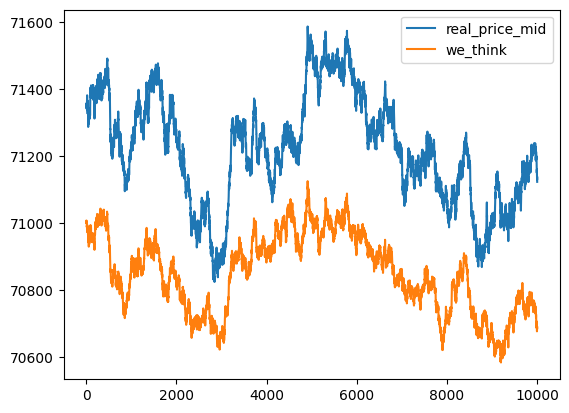

In [39]:
real_price_mid = df[df["product"] == "GIFT_BASKET"]["mid_price"]

plt.plot(x, real_price_mid, label="real_price_mid")
plt.plot(x, gb_we_think_mid, label="we_think")
plt.legend()
plt.show()